## Week 1

In [1]:
documents = [
    "this is an example sentence, nothing special happening in this sentence",
    "again a very ordinary sentence without anything special happening",
    "this is a sentence as example. this is another example sentence",
    "yet another sentence, simple and ordinary"
]

### Task 1) Write a function tokenize that takes as input a list of documents where the elements are strings. Separate the units of these text strings (e.g., words) into individual strings. As output, return them as a list of lists (where documents is the main list, and each element is a list of tokens; a list per document). You can use functionality from the string type (docs), and the string package (docs).

In [4]:
import string

def tokenize(documents):
    tokenized_documents = []
    for document in documents:
        token_list = []
        for token in document.split(' '):
            if token[-1] in string.punctuation:
                token_list += [token[:-1], token[-1]]
            else:
                token_list.append(token)
        tokenized_documents.append(token_list)
    return tokenized_documents

tokenize(documents)

[['this',
  'is',
  'an',
  'example',
  'sentence',
  ',',
  'nothing',
  'special',
  'happening',
  'in',
  'this',
  'sentence'],
 ['again',
  'a',
  'very',
  'ordinary',
  'sentence',
  'without',
  'anything',
  'special',
  'happening'],
 ['this',
  'is',
  'a',
  'sentence',
  'as',
  'example',
  '.',
  'this',
  'is',
  'another',
  'example',
  'sentence'],
 ['yet', 'another', 'sentence', ',', 'simple', 'and', 'ordinary']]

### Task 2) Write a function vectorize that takes as input the output of tokenize (i.e., documents). It should return a term * document matrix (as a list of lists), where each element is the associated term frequency $\text{tf}(t, d)$. Furthermore, it should return the vocabulary $T$ as a list.   Collections has some interesting functionality for this. Make sure to sort 𝑇 alphabetically for consistency (check updated solution file above). Collections has some interesting functionality for word frequencies.

In [16]:
from collections import Counter

def vectorize(documents):
    M = []
    T = sorted(set([token for document in documents for token in document]))
    for document in documents:
        vector = []
        freq_dict = Counter(document)
        for t in T:
            vector.append(freq_dict[t])
        M.append(vector)
    return M, T

vectorize(tokenize(documents))


([[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0],
  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
  [0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0],
  [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]],
 [',',
  '.',
  'a',
  'again',
  'an',
  'and',
  'another',
  'anything',
  'as',
  'example',
  'happening',
  'in',
  'is',
  'nothing',
  'ordinary',
  'sentence',
  'simple',
  'special',
  'this',
  'very',
  'without',
  'yet'])

### Task 3) Write a function cossim that takes as input the output of vectorize (i.e., M, T). It should return the indices (two ints) of the document pair with the highest cosine similarity (not itself). Note: i) cosine similarity is symmetrical (p*q == q*p), ii) you do not need to use T for the solution, this is just for provided for function compatibility. You can use numpy for the required math.

In [9]:
%pip install numpy -q

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np

def cossim(M, T):
    sims = {}
    for i in range(len(M)):
        for j in range(i, len(M)):
            if i == j:
                continue
            p, q = M[i], M[j]
            sims[(i, j)] = np.dot(p, q) / (np.sqrt(np.dot(p, p)) * 
                                           np.sqrt(np.dot(q, q)))
    return sorted(sims.items(), key=lambda x: x[1], reverse=True)[0][0]

cossim(vectorize(tokenize(documents))[0], vectorize(tokenize(documents))[1])

(0, 2)

In [21]:
# Alternative using spacy
%pip install spacy -q
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
import spacy
nlp = spacy.load('en_core_web_sm')

sims = {}
for i in range(len(documents)):
    for j in range(i, len(documents)):
        if i == j:
            continue
        sims[(i, j)] = nlp(documents[i]).similarity(nlp(documents[j]))

print(sorted(sims.items(), key=lambda x: x[1], reverse=True)[0][0])

(0, 2)


/var/folders/kr/pgq9gfts7j3bn4n2v53xh98m0000gn/T/ipykernel_20911/1286620405.py:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  sims[(i, j)] = nlp(documents[i]).similarity(nlp(documents[j]))


# Week 2

In [2]:
%pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas -q

Note: you may need to restart the kernel to use updated packages.


## Loading Data

In [5]:
import pandas as pd

file_path = "data/reddit-100000.csv"

# Load the file line by line and reconstruct the DataFrame manually
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    header = file.readline().strip().split(",")  # Extract header
    for line in file:
        # Process each line and split into columns
        try:
            row = line.strip().split(",", maxsplit=1)
            if len(row) == 2:
                data.append(row)
        except Exception:
            continue

# Create a DataFrame from the collected data
df = pd.DataFrame(data, columns=header)

df.head()

,subreddit,text
0,Conservative,Computer science. I think I'm making the corre...
1,Conservative,&gt;half wait more half wait less what’s so wr...
2,Conservative,[deleted]
3,Conservative,"""I heard him loud and clear, what are you talk..."
4,Republican,"""r/conservative won’t mass downvote. Meme subs..."


## Descriptive Stats

In [25]:
df.subreddit.value_counts()

subreddit
Conservative                                                                                                                                                                                                                                                                                                                                                            78662
Republican                                                                                                                                                                                                                                                                                                                                                               9682
democrats                                                                                                                                                                                                                                                         

In [22]:
counts = df.text.str.count('Trump')
counts.name = "counts"
count_df = pd.concat([df.subreddit, counts >= 1], axis=1)
print(count_df.value_counts(sort=False))  # not sorted is clearer (imo)

subreddit                                                                                                                                                                                                                                                                                                                                                             counts
&gt; there are multiple interests in the republican base                                                                                                                                                                                                                                                                                                              False         1
&gt;If you keep waiting for a mythical candidate                                                                                                                                                                                                                     

In [23]:
df.pivot_table(values='text', index='subreddit',  # >= 1 is optional
               aggfunc=lambda x: sum(x.str.count('Trump') >= 1))

,text
subreddit,
&gt; there are multiple interests in the republican base,0
&gt;If you keep waiting for a mythical candidate,0
&gt;if the other wing of the party cant handle losing,0
CNN on the most part during the primaries,0
Conservative,8918
Democrats are committed to protecting and advancing reproductive health,0
Hell,0
I mean that's not to say you don't have to read the poll to see what type of people they polled,0
I really like the “Dictators Speech”,0


## Tokens

In [6]:
tokens = df.text.str.findall('\w+|[^\w\s]')  # optional .str.join(' ')
print(tokens)

0         [Computer, science, ., I, think, I, ', m, maki...
1         [&, gt, ;, half, wait, more, half, wait, less,...
2                                           [[, deleted, ]]
3         [", I, heard, him, loud, and, clear, ,, what, ...
4         [", r, /, conservative, won, ’, t, mass, downv...
                                ...                        
100037    [member, Bush, 2004, ., They, will, kick, you, .]
100038                               [That, ', s, politics]
100039                   [", Then, sure, ,, why, not, ., "]
100040    [vague, rhetoric, isn, ', t, out, of, the, ord...
100041    [", Can, you, EVEN, imagine, those, debates, ?...
Name: text, Length: 100042, dtype: object


<Axes: >

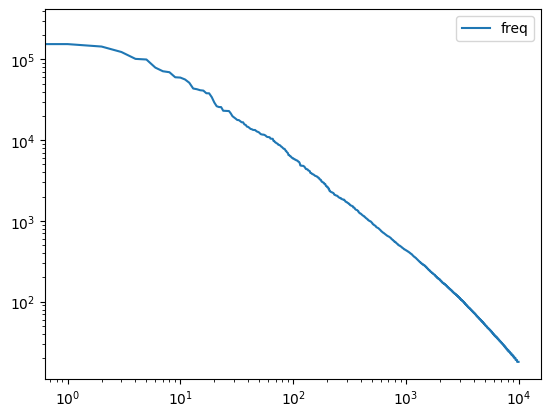

In [7]:
%matplotlib inline 
from collections import Counter

tokens = df.text.str.findall('\w+|[^\w\s]')  # from previous part
c = Counter()
for x in tokens:
    c += Counter(x)
    
pd.DataFrame(c.most_common(10000),
             columns=['word', 'freq']).plot(loglog=True)

In [9]:
%pip install tqdm -q

Note: you may need to restart the kernel to use updated packages.


In [13]:
import tqdm

def top_words_per_subreddit(labels, df):
    counters = {label: Counter() for label in labels}
    for ix, row in tqdm(df.iterrows()):
        counters[row.label] += Counter(row.text)
    # NOTE: gets too messy if we do this in the loop below
    top_words = {label: set([w for w, i in c.most_common(5000)])
                 for label, c in counters.items()}
    unique_words = {}
    for i, set_i in top_words.items():
        master_set = set()
        for j, set_j in top_words.items():
            if i == j:
                continue
            master_set = master_set.union(set_j)
        unique_words[i] = set_i - master_set
            
    return unique_words

top_words_per_subreddit(df["subreddit"].unique(), df)

TypeError: 'module' object is not callable

## Using SpaCy

In [14]:
!python -m pip install -U pip setuptools wheel
!python -m pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.44.0
    Uninstalling wheel-0.44.0:
      Successfully uninstalled wheel-0.44.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')

print([token.text for token in nlp("This is a text with some words.")])

['This', 'is', 'a', 'text', 'with', 'some', 'words', '.']


In [19]:
import spacy


class Preprocessor(object):
    
    def __init__(self, method='regex'):
        self.nlp = spacy.load('en_core_web_sm')
        if method == 'regex':
            self.proc = self.regex_tokens
        elif method == 'spacy':
            self.proc = self.spacy_tokens
        elif method == 'spacy-lemma':
            self.proc = self.spacy_lemma
        
    def regex_tokens(self, X):
        return X.str.findall('\w+|[^\w\s]').to_list()
    
    def spacy_tokens(self, X):
        return [[token.text for token in nlp(text)] for text in X]
    
    def spacy_lemma(self, X):
        return [[token.lemma_ for token in nlp(text)] for text in X]  
    
    def transform(self, X):
        return self.proc(X)

 
proc = Preprocessor(method='spacy-lemma')
proc.transform(df.text)

[['computer',
  'science',
  '.',
  'I',
  'think',
  'I',
  'be',
  'make',
  'the',
  'correct',
  'choice',
  '.'],
 ['&',
  'gt;half',
  'wait',
  'more',
  'half',
  'wait',
  'less',
  'what',
  '’s',
  'so',
  'wrong',
  'about',
  'that',
  '?',
  ' ',
  'what',
  '’',
  'so',
  'wrong',
  'be',
  'that',
  'those',
  'wait',
  'time',
  'be',
  'bad',
  'than',
  'the',
  'international',
  'average',
  '.'],
 ['[', 'delete', ']'],
 ['"',
  'I',
  'hear',
  'he',
  'loud',
  'and',
  'clear',
  ',',
  'what',
  'be',
  'you',
  'talk',
  'about',
  '?',
  '"'],
 ['"',
  'r',
  '/',
  'conservative',
  'will',
  'not',
  'mass',
  'downvote',
  '.',
  'meme',
  'sub',
  'tend',
  'to',
  'be',
  'equal',
  'opportunist',
  '(',
  'usually',
  ')',
  'and',
  'while',
  'they',
  'be',
  'n’t',
  'political',
  'sub',
  ',',
  'you',
  'can',
  'make',
  'a',
  'political',
  'comment',
  'without',
  'die',
  '.',
  '"'],
 ['[', 'remove', ']'],
 ['^',
  'this',
  'be',
  'why',